<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module B** 
**17.1** Interpolation

**17.2** Linear Interpolation

**17.3** Cubic Spline Interpolation

---



###**Section 17.1: Interpolation**

*Summary:*

Interpolation is a method of estimating the value of a function at an unknown point using known data points. It is also a way of estimating the function from which the known points were generated. While it gives us an estimation, it is not an exact method. The first two methods of interpolation that will be discussed here are linear interpolation and cubic spline interpolation.

---
*Implementation:*

To illustrate the problem which interpolation helps solve, let's plot the data points from the textbook.



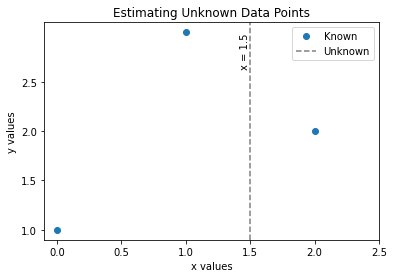

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data points given from Section 17.2
x_values = [0,1,2]
y_values = [1,3,2]

# Plot the data points
plt.plot(x_values, y_values, 'o', label='Known')
plt.gca().set_title("Estimating Unknown Data Points")
plt.xlabel('x values')
plt.ylabel('y values')

# Set plot ticks to be in intervals of 0.5
plt.xticks(np.arange(0, 3, 0.5))
plt.yticks(np.arange(1, 3, 0.5))

# Indicate that x = 1.5 is unknown
plt.axvline(x=1.5, linestyle='--', color='gray', label='Unknown')
plt.text(1.5, max(y_values), 'x = 1.5', rotation=90, va='top', ha='right')

plt.legend()

# Display the plot and save
plt.show()
#plt.savefig("interpolation_example.png")


Here we see the given data points in pairings of $x,y$ which are $(0,1)$, $(1,3)$, and $(2,2)$. If we wanted to know the exact value at $x = 1.5$, the data is unknown. Thus we can use interpolation to estimate the value.

---

###**Section 17.2: Linear Interpolation**

*Summary:*

One such method of interpolation would be a linear approach. The assumption is that between each of our known data points, the function is linear. We can imagine a straight line drawn from point to point. If we know the equation of each of these lines we can then make an estimation for the value of the function at a given point between our data set.

---

*Implementation:*

The ```scipy``` library provides a function called ```interp1d``` that we can use for implementing linear interpolation with our given dataset. However, since this was implemented already in the textbook, we can find the interpolation at $x$ using the following equation from the text:
$\hat{y}(x) = y_i + \frac{(y_{i+1} - y_i)(x - x_i)}{(x_{i+1} - x_i)}$. So in order to estimate the value of the function at $x = 1.5$, we would need to compute the interval that contains $x = 1.5$ where each end point is in the dataset. We can see that $1 < 1.5 < 2$, but we can also write a function to determine this interval.

In [4]:
#Find the index of the interval 
def find_interval(arr, value):
    for i in range(len(arr)):
        if value <= arr[i]:
            return i-1
    return len(arr)

Next, we can write a function which implements the equation for $\hat{y}(x)$:

In [3]:
#linear interpolation at x using the provided formula.
def linear_interpolation(x, x_values, y_values):
    index = find_interval(x_values, x)
    return y_values[index] + (y_values[index+1] - y_values[index]) * (x - x_values[index]) / (x_values[index+1] - x_values[index])

Now we just need to use the provided dataset as inputs and plot.

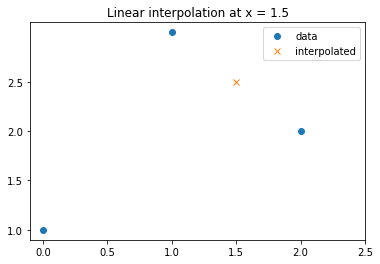

The interpolated y-value at x = 1.5 is 2.5


In [25]:
# Data points
x_values = [0,1,2]
y_values = [1,3,2]

# Interpolation point
x = 1.5

# Interpolate the data
y_interp = linear_interpolation(x, x_values, y_values)

# Plot the data points and the interpolated point
plt.plot(x_values, y_values, 'o', x, y_interp, 'x')

#Title
plt.gca().set_title("Linear interpolation at x = 1.5")

# Set plot ticks to be in intervals of 0.5
plt.xticks(np.arange(0, 3, 0.5))
plt.yticks(np.arange(1, 3, 0.5))

plt.legend(['data', 'interpolated'], loc='best')
plt.show()

# Print the interpolated value
print("The interpolated y-value at x =", x, "is", y_interp)






---

###**Section 17.3: Cubic Spline Interpolation**


*Summary:*

The linear method that we implemented in the last section assumes that the data is linear. We can instead use cubic functions between intervals which assumes that the interpolated function is a smooth function. In other words, the first and second derivative of the interpolated function are continous. This method is called cubic spline interpolation.

The number of cubic functions used are $n - 1$ where $n$ is the number of points from the given dataset. This means that the cubic spline interpolation for our dataset will include two cubic functions. 

---

*Implementation:*

The textbook uses the ```CubicSpline``` function from the ```scipy``` library to plot the cubic spline interpolation of the data set over $0 \leq x \leq 2$. However, there was a constraint which makes the first and second derivatives zero at the endpoints. Let's implement the cubic spline interpolation with different constraints to illustrate the difference between the function that is generated. First, we'll include the plot where there are no continuity constraints on the first and second derivative. Then, we'll include a plot which only continuity constraints on the first derivative. Lastly, we'll compare the two plots to the one shown in the textbook, which has continuity constraints on both the first and second derivative. All of these constraints, or lack thereof, are at the endpoints.

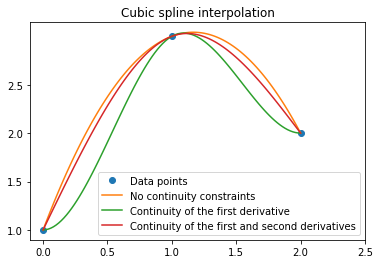

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data points
x_values = [0,1,2]
y_values = [1,3,2]

# Interpolation points
x_interp = np.linspace(0, 2, 100)

# Create a cubic spline with no continuity constraints
spline_no_constraints = CubicSpline(x_values, y_values, bc_type='not-a-knot')

# Create a cubic spline with continuity of the first derivative
spline_first_derivative = CubicSpline(x_values, y_values, bc_type='clamped')

# Create a cubic spline with continuity of the first and second derivatives
spline_first_second_derivative = CubicSpline(x_values, y_values, bc_type='natural')

# Interpolate the data
y_interp_no_constraints = spline_no_constraints(x_interp)
y_interp_first_derivative = spline_first_derivative(x_interp)
y_interp_first_second_derivative = spline_first_second_derivative(x_interp)

# Plot
plt.plot(x_values, y_values, 'o', label='Data points')
plt.plot(x_interp, y_interp_no_constraints, label='No continuity constraints')
plt.plot(x_interp, y_interp_first_derivative, label='Continuity of the first derivative')
plt.plot(x_interp, y_interp_first_second_derivative, label='Continuity of the first and second derivatives')

#Title
plt.gca().set_title("Cubic spline interpolation")

# Set plot ticks to be in intervals of 0.5
plt.xticks(np.arange(0, 3, 0.5))
plt.yticks(np.arange(1, 3, 0.5))

plt.legend(loc='best')
plt.show()

Here we see a similar result between no continunity constraints and continuity fo the first and second derivatives. However, since the first and second derivatives are zero at the end points with constraints, the smooth curve will be nearly a straight line near the end points. We can illustrate this by finding derivatives using the ```derivative``` method that belongs to the ```CubicSpline``` class in the ```scipy``` library. This will allow us plot lines at the end points.

In [ ]:
# Define the data points
x = [0, 1, 2]
y = [1, 3, 2]

# Create a cubic spline with natural constraints
cs = CubicSpline(x, y, bc_type='natural')

# Generate x values for plotting
x_interp = np.linspace(0, 2, 100)

# Calculate the y values for the cubic spline
y_interp = cs(x_interp)

# Get the first derivative of the spline at the first endpoint
m1 = cs.derivative(1)(x[0])
b1 = y[0] - m1 * x[0]
y1 = m1 * x_interp + b1

# Get the first derivative of the spline at the second endpoint
m2 = cs.derivative(1)(x[-1])
b2 = y[-1] - m2 * x[-1]
y2 = m2 * x_interp + b2

# Plot the data points and the cubic spline
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp, label='Cubic Spline (natural)', color = 'red')
plt.plot(x_interp, y1, label='First endpoint', color = 'blue')
plt.plot(x_interp, y2, label='Second endpoint', color = 'green')

# Add grid and labels
plt.xlabel('x')
plt.ylabel('y')

# Add a title
plt.title("Cubic Spline interpolation with straight lines at the endpoints")

# Set plot ticks to be in intervals of 0.5
plt.xticks(np.arange(0, 3, 0.5))
plt.yticks(np.arange(1, 3, 0.5))

# Show the plot
plt.legend()
plt.show()

Notice that the cubic spline interpolation function approaches a straight line near the end points. If we change ```bc_type = 'natural'``` to ```bc_type = 'not-a-knot'``` we run the same script for the interpolation function without constraints.

In [ ]:
# Define the data points
x = [0, 1, 2]
y = [1, 3, 2]

# Create a cubic spline with natural constraints
cs = CubicSpline(x, y, bc_type='not-a-knot')

# Generate x values for plotting
x_interp = np.linspace(0, 2, 100)

# Calculate the y values for the cubic spline
y_interp = cs(x_interp)

# Get the first derivative of the spline at the first endpoint
m1 = cs.derivative(1)(x[0])
b1 = y[0] - m1 * x[0]
y1 = m1 * x_interp + b1

# Get the first derivative of the spline at the second endpoint
m2 = cs.derivative(1)(x[-1])
b2 = y[-1] - m2 * x[-1]
y2 = m2 * x_interp + b2

# Plot the data points and the cubic spline
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp, label='Cubic Spline (not-a-knot)', color = 'orange')
plt.plot(x_interp, y1, label='First endpoint', color = 'blue')
plt.plot(x_interp, y2, label='Second endpoint', color = 'green')

# Add grid and labels
plt.xlabel('x')
plt.ylabel('y')

# Add a title
plt.title("Cubic Spline interpolation with straight lines at the endpoints")

# Set plot ticks to be in intervals of 0.5
plt.xticks(np.arange(0, 3, 0.5))
plt.yticks(np.arange(1, 3, 0.5))

# Show the plot
plt.legend()
plt.show()

By drawing these straight lines at the end points, the difference between the two ```bc_type``` parameters is more apparent.

Lastly, we can compare the estimation of $x = 1.5$ across the different constraints.


In [27]:
# Find the interpolated value for x = 1.5
x = 1.5

# Interpolate the data with no continuity constraints
y_interp_no_constraints = spline_no_constraints(x)

# Interpolate the data with continuity of the first derivative
y_interp_first_derivative = spline_first_derivative(x)

# Interpolate the data with continuity of the first and second derivatives
y_interp_first_second_derivative = spline_first_second_derivative(x)

# Print the interpolated values
print("Interpolated value with no continuity constraints:", y_interp_no_constraints)
print("Interpolated value with continuity of the first derivative:", y_interp_first_derivative)
print("Interpolated value with continuity of the first and second derivatives:", y_interp_first_second_derivative)



Interpolated value with no continuity constraints: 2.875
Interpolated value with continuity of the first derivative: 2.59375
Interpolated value with continuity of the first and second derivatives: 2.78125
